# EDA
- **abordagem:** vou usar todos intervalos num só para verificar o desempenho... secalhar é melhor do que achamos

Neste ficheiro não vou prever o modelo, vou só mesmo fazer a análise exploratória

## Preparação dos Dados

1.Juntar os ficheiros

In [195]:
import pandas as pd
import glob

all_files = sorted(glob.glob("student_features_interval_*.csv"))
df_all = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

2. Remover colunas irrelevantes para treino (não são features numéricas úteis)


In [196]:
cols_to_drop = ["project_id", "group_id", "mention_handle"]
df_all_clean = df_all.drop(columns=[col for col in cols_to_drop if col in df_all.columns])

3. Manter apenas linhas com nota final

In [197]:
df_all_clean = df_all_clean.dropna(subset=["Final Grade"])

 4. Separar features e target


In [198]:
X = df_all_clean.drop(columns=["Final Grade"])
y = df_all_clean["Final Grade"]

In [199]:
X.head()

,interval,total_commits,sum_lines_added,sum_lines_deleted,sum_lines_per_commit,active_days,last_minute_commits,total_merge_requests,merged_requests,review_comments_given,review_comments_received,total_issues_created,total_issues_assigned,issues_resolved,issue_participation,branches_created,merges_to_main_branch
0,1,5,89,6,95,5,0,0,0,0,0,1,1,1,2,53,12
1,1,7,19,3,22,2,0,0,0,0,0,3,2,3,4,53,12
2,1,11,686,3,689,4,0,1,1,1,7,2,3,2,3,53,12
3,1,4,28,11,39,2,0,0,0,0,0,2,2,2,2,53,12
4,1,3,19,1,20,2,0,0,0,3,0,1,1,1,1,53,12


In [200]:
y.head()

0    15
1    16
2    15
3    16
4    16
Name: Final Grade, dtype: int64

## EDA

In [201]:
# adeus duplas
df_all_clean[df_all_clean.duplicated()]

,interval,total_commits,sum_lines_added,sum_lines_deleted,sum_lines_per_commit,active_days,last_minute_commits,total_merge_requests,merged_requests,review_comments_given,review_comments_received,total_issues_created,total_issues_assigned,issues_resolved,issue_participation,branches_created,merges_to_main_branch,Final Grade
86,1,0,0,0,0,0,0,1,1,3,5,1,1,1,1,2,42,10
126,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,4,14
127,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,98,4,12
128,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,98,4,12
176,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,81,4,17
366,2,0,0,0,0,0,0,0,0,0,0,0,2,0,2,42,10,12
370,2,0,0,0,0,0,0,0,0,0,0,1,2,1,1,42,10,15


In [202]:
df_all_clean.columns
# output: Index(['interval', 'total_commits', 'sum_lines_added', 'sum_lines_deleted',
#       'sum_lines_per_commit', 'active_days', 'last_minute_commits',
#       'total_merge_requests', 'merged_requests', 'review_comments_given',
#       'review_comments_received', 'total_issues_created',
#       'total_issues_assigned', 'issues_resolved', 'issue_participation',
#       'branches_created', 'merges_to_main_branch', 'Final Grade'],
#      dtype='object')

Index(['interval', 'total_commits', 'sum_lines_added', 'sum_lines_deleted',
       'sum_lines_per_commit', 'active_days', 'last_minute_commits',
       'total_merge_requests', 'merged_requests', 'review_comments_given',
       'review_comments_received', 'total_issues_created',
       'total_issues_assigned', 'issues_resolved', 'issue_participation',
       'branches_created', 'merges_to_main_branch', 'Final Grade'],
      dtype='object')

In [203]:
target = 'Final Grade'

In [204]:
features = []
for col in df_all_clean.columns:
    if col != target and col != "interval":
        features.append(col)

In [205]:
import numpy as np
numerical_features = df_all_clean[features].select_dtypes(include=np.number).columns.tolist()

In [206]:
categorical_features = df_all_clean[features].select_dtypes(exclude=np.number).columns.tolist()

In [207]:
categorical_features # não existem!!

[]

In [208]:
df_all_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   interval                  1077 non-null   int64
 1   total_commits             1077 non-null   int64
 2   sum_lines_added           1077 non-null   int64
 3   sum_lines_deleted         1077 non-null   int64
 4   sum_lines_per_commit      1077 non-null   int64
 5   active_days               1077 non-null   int64
 6   last_minute_commits       1077 non-null   int64
 7   total_merge_requests      1077 non-null   int64
 8   merged_requests           1077 non-null   int64
 9   review_comments_given     1077 non-null   int64
 10  review_comments_received  1077 non-null   int64
 11  total_issues_created      1077 non-null   int64
 12  total_issues_assigned     1077 non-null   int64
 13  issues_resolved           1077 non-null   int64
 14  issue_participation       1077 non-null 

In [209]:
df_all_clean.isnull().sum()

interval                    0
total_commits               0
sum_lines_added             0
sum_lines_deleted           0
sum_lines_per_commit        0
active_days                 0
last_minute_commits         0
total_merge_requests        0
merged_requests             0
review_comments_given       0
review_comments_received    0
total_issues_created        0
total_issues_assigned       0
issues_resolved             0
issue_participation         0
branches_created            0
merges_to_main_branch       0
Final Grade                 0
dtype: int64

In [210]:
df_all_clean.describe()

,interval,total_commits,sum_lines_added,sum_lines_deleted,sum_lines_per_commit,active_days,last_minute_commits,total_merge_requests,merged_requests,review_comments_given,review_comments_received,total_issues_created,total_issues_assigned,issues_resolved,issue_participation,branches_created,merges_to_main_branch,Final Grade
count,1077.000000,1077.000000,1.077000e+03,1077.000000,1.077000e+03,1077.000000,1077.0,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,3.080780,9.865367,6.279112e+03,1065.789229,7.344902e+03,2.166202,0.0,4.000000,3.560817,23.252553,23.987001,10.406685,9.167131,9.175487,20.693593,37.569174,108.844011,13.469824
std,1.389677,30.314208,5.833830e+04,18071.499086,6.226946e+04,5.588029,0.0,5.964424,5.591688,61.966154,40.997572,16.894321,10.771879,14.908140,30.352405,36.485065,128.082287,3.174344
min,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,3.000000,2.000000,12.000000,12.000000
50%,3.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,1.000000,1.000000,3.000000,5.000000,5.000000,6.000000,4.000000,12.000000,42.000000,44.000000,14.000000
75%,4.000000,1.000000,1.000000e+00,0.000000,2.000000e+00,1.000000,0.0,6.000000,5.000000,21.000000,31.000000,13.000000,13.000000,12.000000,23.000000,81.000000,160.000000,16.000000
max,5.000000,439.000000,1.167686e+06,581333.000000,1.172220e+06,52.000000,0.0,45.000000,45.000000,852.000000,339.000000,220.000000,100.000000,211.000000,326.000000,98.000000,488.000000,19.000000


In [211]:
# o last_minute_commits é sempre = 0 então não faz sentido
df_all_clean["last_minute_commits"].value_counts()

last_minute_commits
0    1077
Name: count, dtype: int64

In [212]:
df_all_clean = df_all_clean.drop(columns=["last_minute_commits"])

In [213]:
# apagar tambem do numerical features
numerical_features.remove("last_minute_commits")

Vamos agora analisar o target

In [214]:
df_all_clean[target].describe()

count    1077.000000
mean       13.469824
std         3.174344
min         0.000000
25%        12.000000
50%        14.000000
75%        16.000000
max        19.000000
Name: Final Grade, dtype: float64

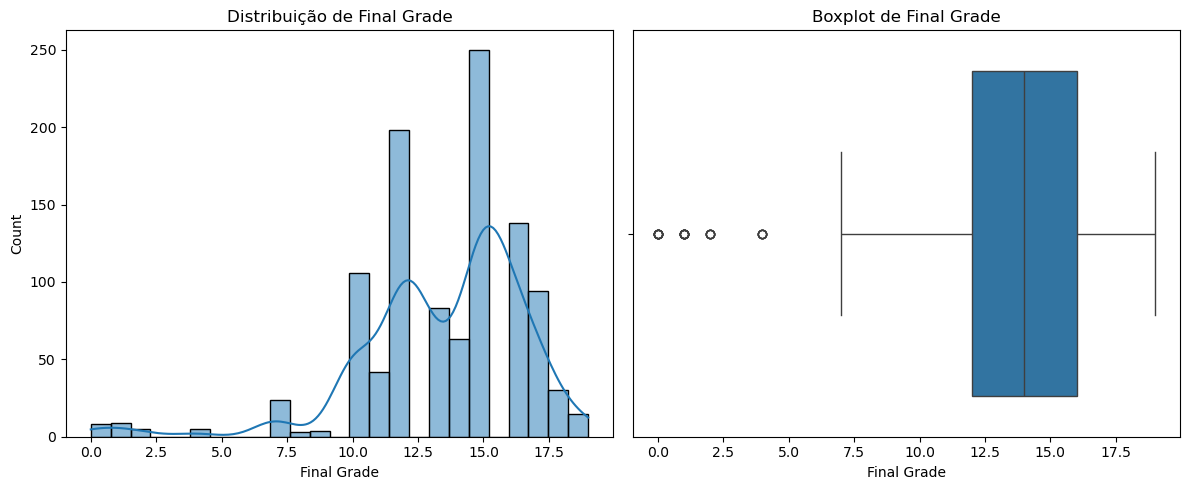

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_all_clean[target], kde=True)
plt.title(f'Distribuição de {target}')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_all_clean[target])
plt.title(f'Boxplot de {target}')

plt.tight_layout()
plt.show()

In [216]:
df_all_clean[target].value_counts(normalize=True).sort_index()

Final Grade
0     0.007428
1     0.008357
2     0.004643
4     0.004643
7     0.022284
8     0.002786
9     0.003714
10    0.098422
11    0.038997
12    0.183844
13    0.077066
14    0.058496
15    0.232126
16    0.128134
17    0.087279
18    0.027855
19    0.013928
Name: proportion, dtype: float64


Análise Univariada das Features Numéricas:


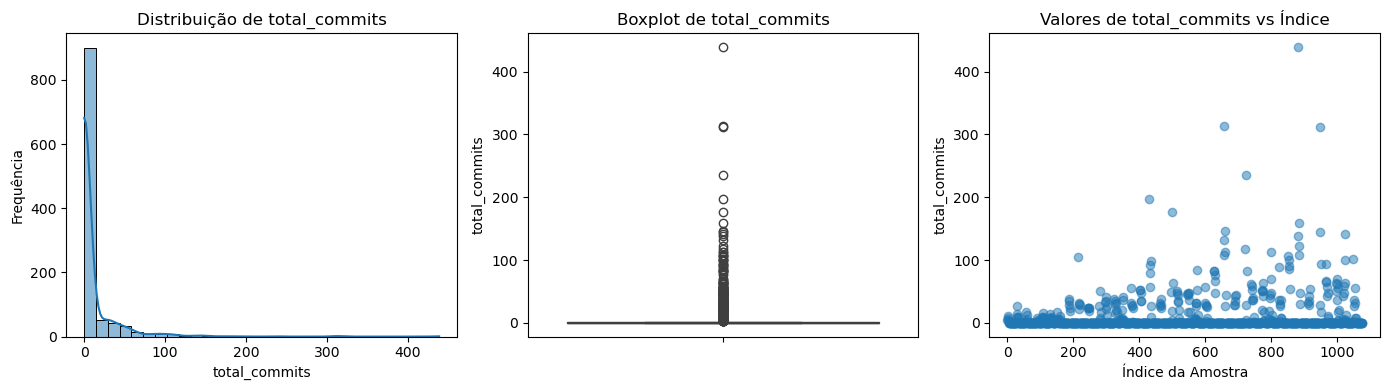

Skewness de total_commits: 6.46
Kurtosis de total_commits: 62.49
  -> total_commits é consideravelmente assimétrica. Considere transformações (ex: log).


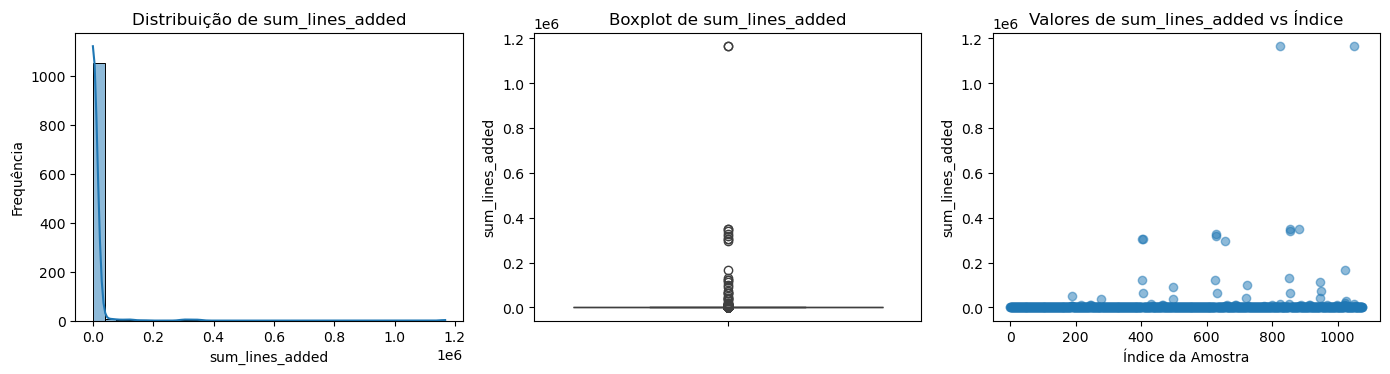

Skewness de sum_lines_added: 15.95
Kurtosis de sum_lines_added: 297.00
  -> sum_lines_added é consideravelmente assimétrica. Considere transformações (ex: log).


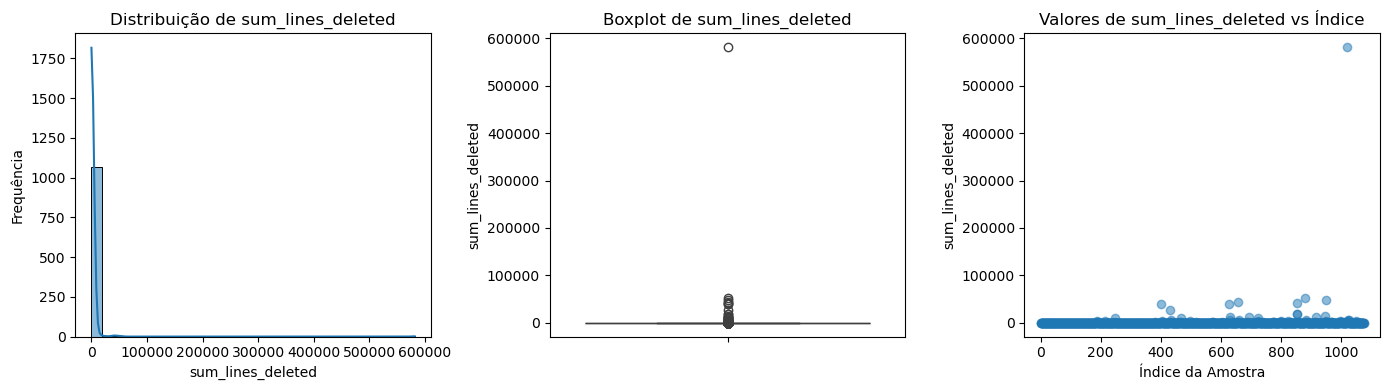

Skewness de sum_lines_deleted: 30.91
Kurtosis de sum_lines_deleted: 990.64
  -> sum_lines_deleted é consideravelmente assimétrica. Considere transformações (ex: log).


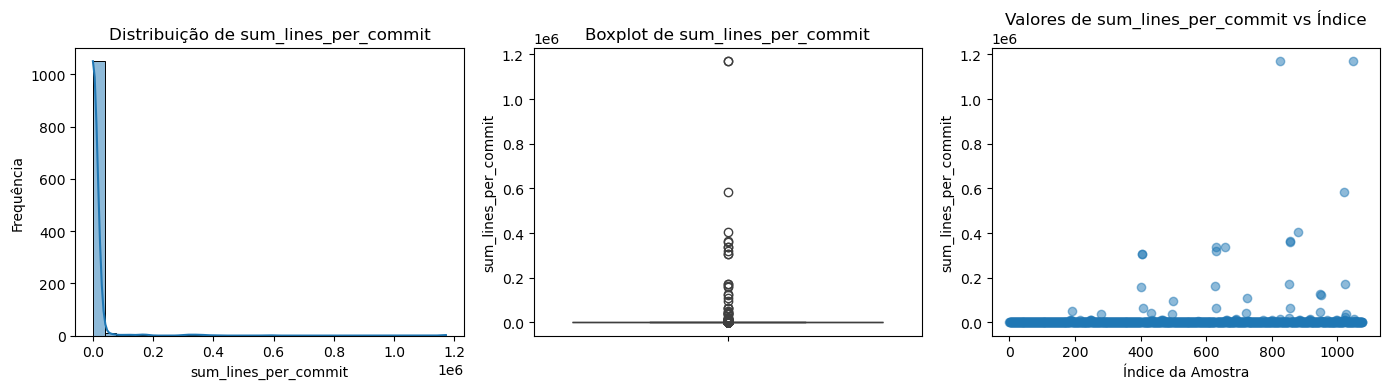

Skewness de sum_lines_per_commit: 14.19
Kurtosis de sum_lines_per_commit: 239.03
  -> sum_lines_per_commit é consideravelmente assimétrica. Considere transformações (ex: log).


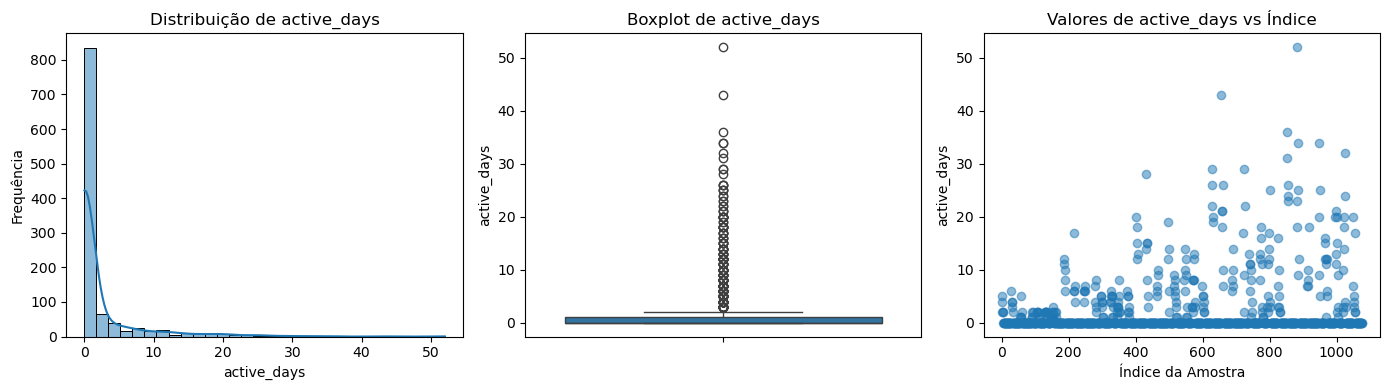

Skewness de active_days: 3.69
Kurtosis de active_days: 16.82
  -> active_days é consideravelmente assimétrica. Considere transformações (ex: log).


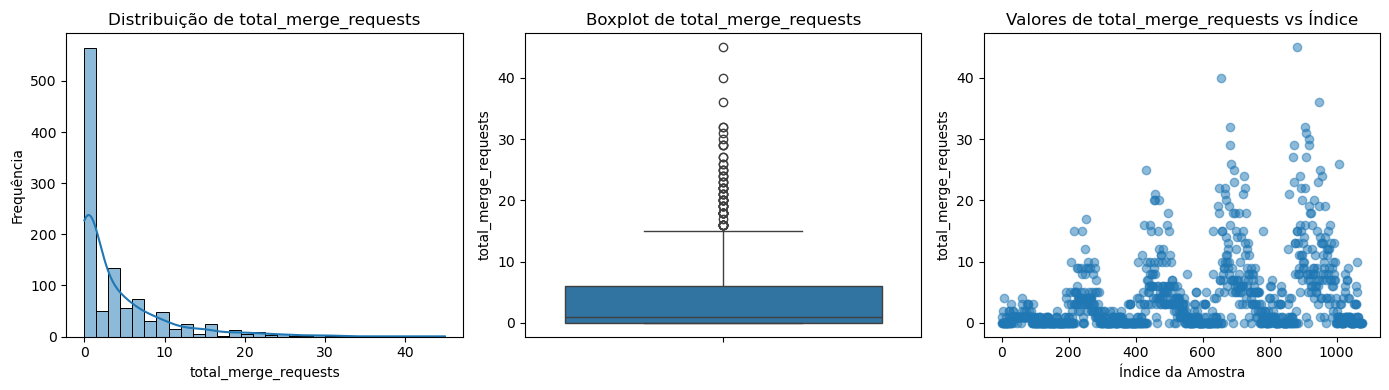

Skewness de total_merge_requests: 2.42
Kurtosis de total_merge_requests: 7.37
  -> total_merge_requests é consideravelmente assimétrica. Considere transformações (ex: log).


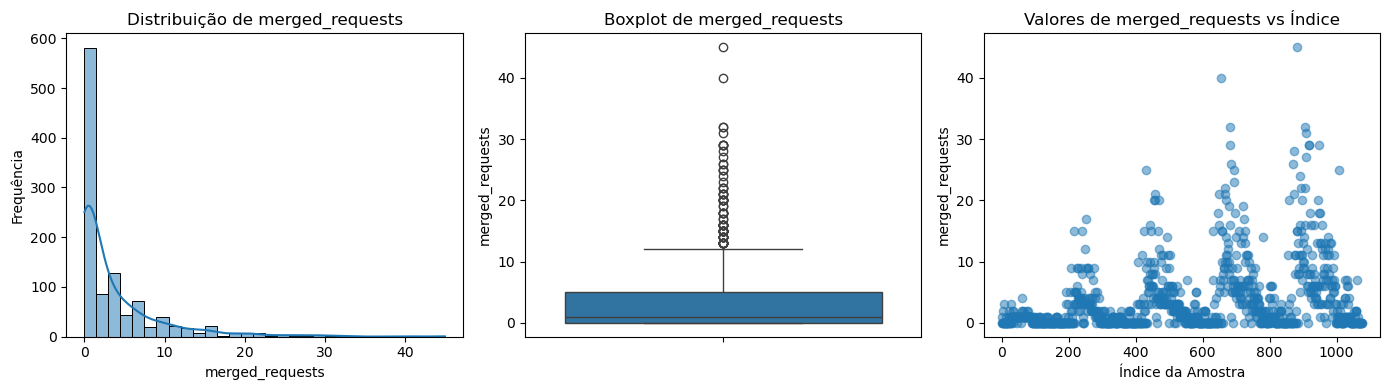

Skewness de merged_requests: 2.67
Kurtosis de merged_requests: 9.25
  -> merged_requests é consideravelmente assimétrica. Considere transformações (ex: log).


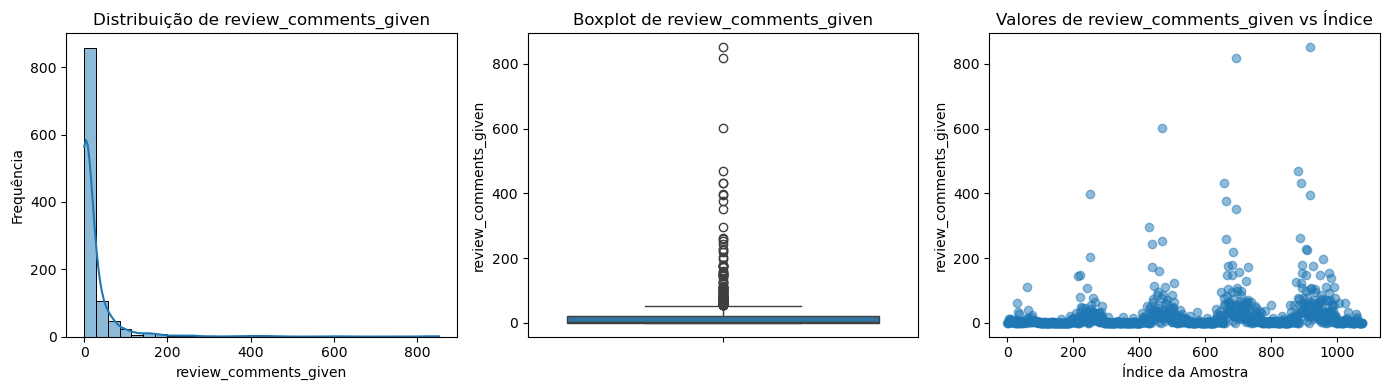

Skewness de review_comments_given: 7.19
Kurtosis de review_comments_given: 71.61
  -> review_comments_given é consideravelmente assimétrica. Considere transformações (ex: log).


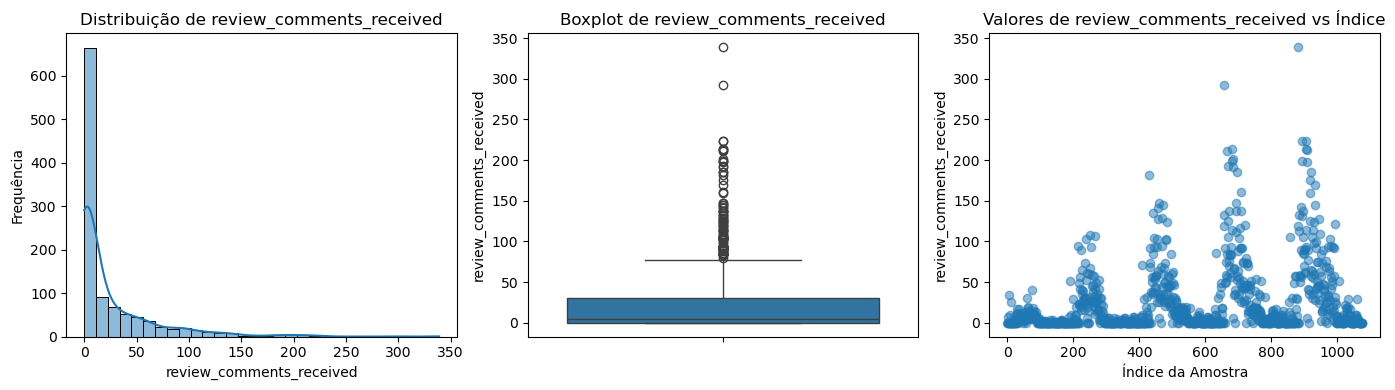

Skewness de review_comments_received: 2.73
Kurtosis de review_comments_received: 9.60
  -> review_comments_received é consideravelmente assimétrica. Considere transformações (ex: log).


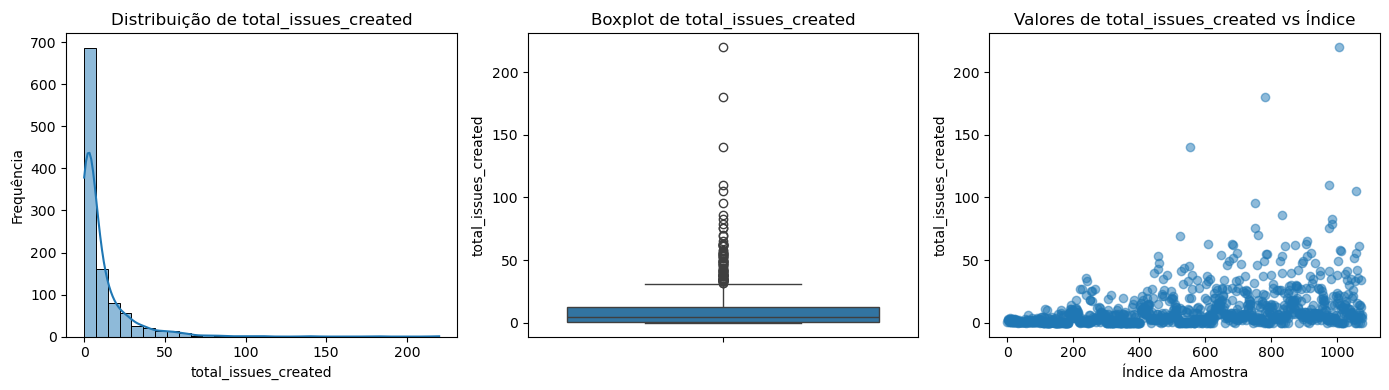

Skewness de total_issues_created: 4.71
Kurtosis de total_issues_created: 38.04
  -> total_issues_created é consideravelmente assimétrica. Considere transformações (ex: log).


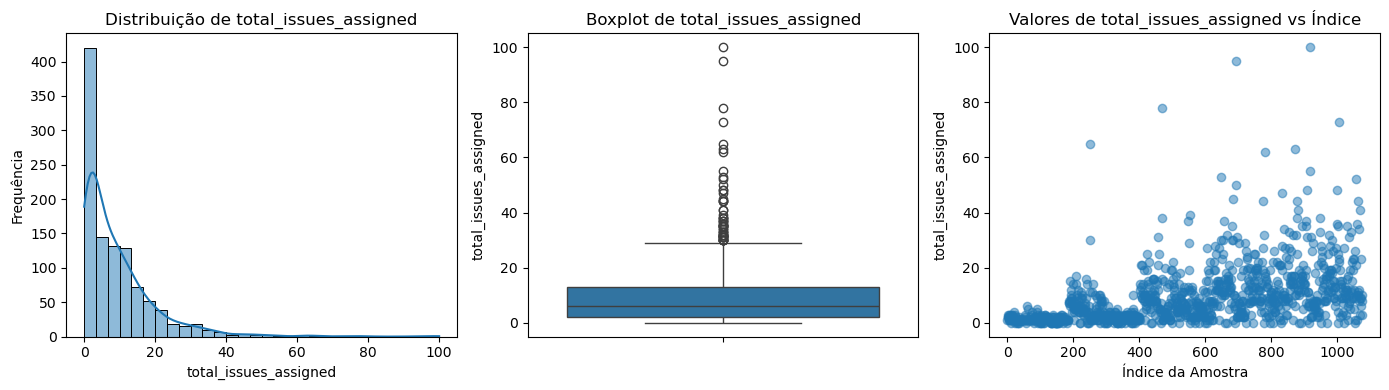

Skewness de total_issues_assigned: 2.83
Kurtosis de total_issues_assigned: 13.35
  -> total_issues_assigned é consideravelmente assimétrica. Considere transformações (ex: log).


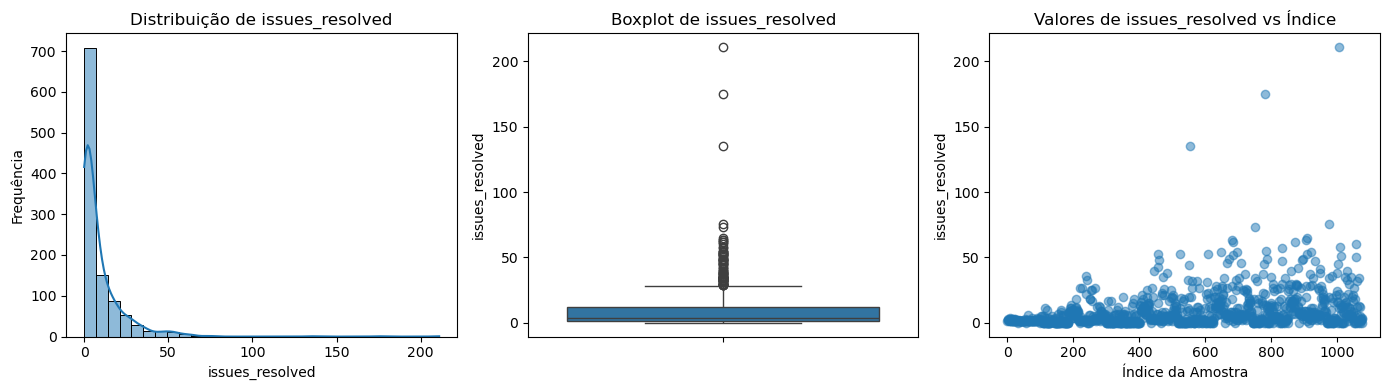

Skewness de issues_resolved: 5.28
Kurtosis de issues_resolved: 50.99
  -> issues_resolved é consideravelmente assimétrica. Considere transformações (ex: log).


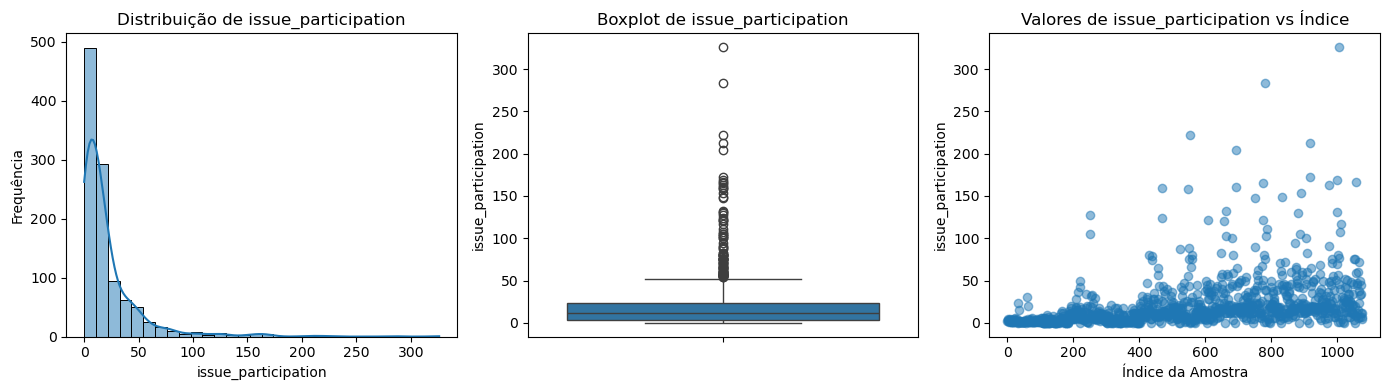

Skewness de issue_participation: 3.96
Kurtosis de issue_participation: 23.15
  -> issue_participation é consideravelmente assimétrica. Considere transformações (ex: log).


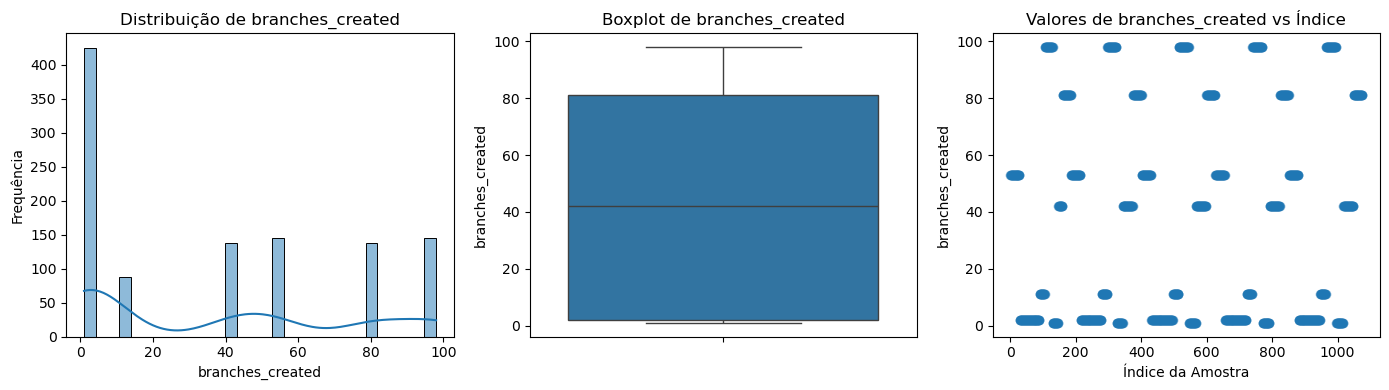

Skewness de branches_created: 0.43
Kurtosis de branches_created: -1.34


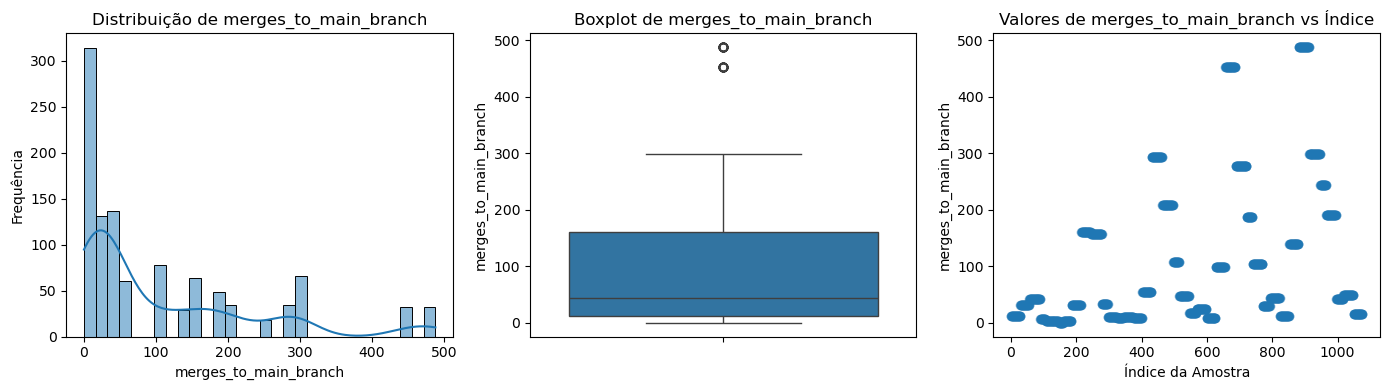

Skewness de merges_to_main_branch: 1.47
Kurtosis de merges_to_main_branch: 1.39
  -> merges_to_main_branch é consideravelmente assimétrica. Considere transformações (ex: log).


In [217]:
print("\nAnálise Univariada das Features Numéricas:")
for col in numerical_features:
    plt.figure(figsize=(14, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(df_all_clean[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

    plt.subplot(1, 3, 2)
    sns.boxplot(y=df_all_clean[col]) # Usar y para boxplot vertical
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

    plt.subplot(1, 3, 3)
    # Scatter plot com um jitter para melhor visualização se houver muitos pontos sobrepostos
    # e para ter uma ideia da relação com o índice (se interval for sequencial)
    if col == 'interval':
        plt.scatter(df_all_clean[col], df_all_clean.index, alpha=0.5)
    else:
        # Para outras features, pode ser útil um scatter com o índice para ver se há padrões
        plt.scatter(df_all_clean.index, df_all_clean[col], alpha=0.5)
    plt.title(f'Valores de {col} vs Índice')
    plt.xlabel('Índice da Amostra')
    plt.ylabel(col)


    plt.tight_layout()
    plt.show()

    skewness = df_all_clean[col].skew()
    kurt = df_all_clean[col].kurtosis()
    print(f"Skewness de {col}: {skewness:.2f}")
    print(f"Kurtosis de {col}: {kurt:.2f}")
    if abs(skewness) > 1:
        print(f"  -> {col} é consideravelmente assimétrica. Considere transformações (ex: log).")
    if df_all_clean[col].min() == 0 and df_all_clean[col].max() == 0 and col != 'last_minute_commits': # last_minute_commits é 0 no exemplo
        print(f"  -> ATENÇÃO: {col} tem todos os valores zero (ou apenas um valor após remoção da linha de erro). Verificar!")
    elif df_all_clean[col].nunique() == 1:
        print(f"  -> ATENÇÃO: {col} tem apenas um valor único. Não será útil para modelagem.")

- quase todas as suas features são altamente assimétricas à direita (skewness positiva e alta) e muitas têm alta kurtosis (distribuições com "caudas pesadas" e picos agudos ==> outliers)
- branches_created é a exceção, com baixa skewness (0.43) e kurtosis negativa (-1.34, platicúrtica, mais "achatada" que a normal).
- merges_to_main_branch tem uma skewness moderada (1.47).

VAMOS FAZER TRANFORMAÇÕES MAIS à FRENTE então

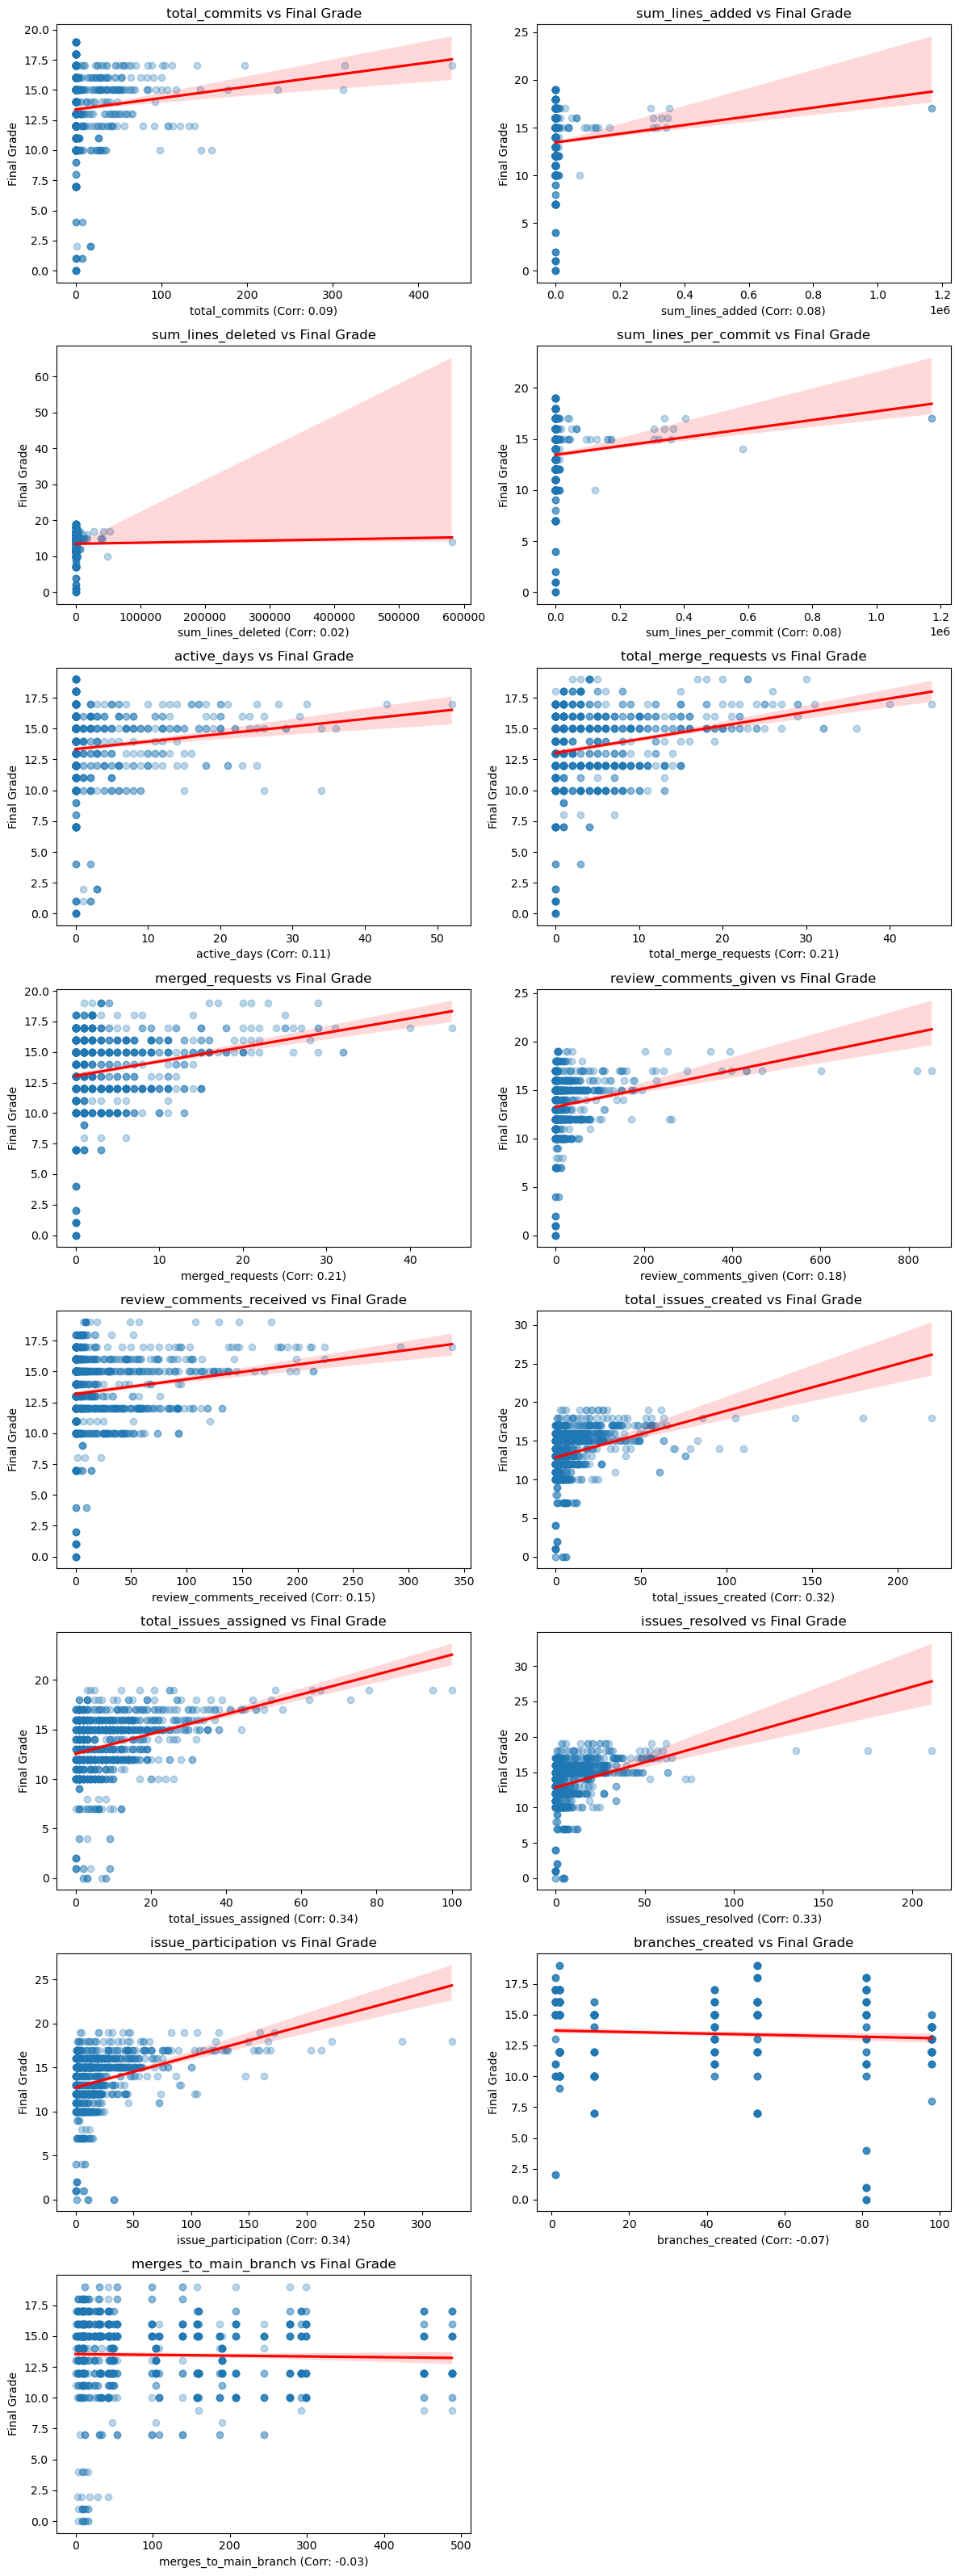

In [218]:
import math

# Definir número de colunas e calcular número de linhas necessário
n_cols = 2
n_rows = math.ceil(len(numerical_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 4))
axes = axes.flatten()  # Para indexar como uma lista simples

for idx, col in enumerate(numerical_features):
    ax = axes[idx]
    correlation = df_all_clean[col].corr(df_all_clean[target])
    
    sns.regplot(
        x=df_all_clean[col],
        y=df_all_clean[target],
        ax=ax,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.3}
    )
    ax.set_title(f'{col} vs {target}')
    ax.set_xlabel(f'{col} (Corr: {correlation:.2f})')
    ax.set_ylabel(target)

# Ocultar eixos extras (caso existam)
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


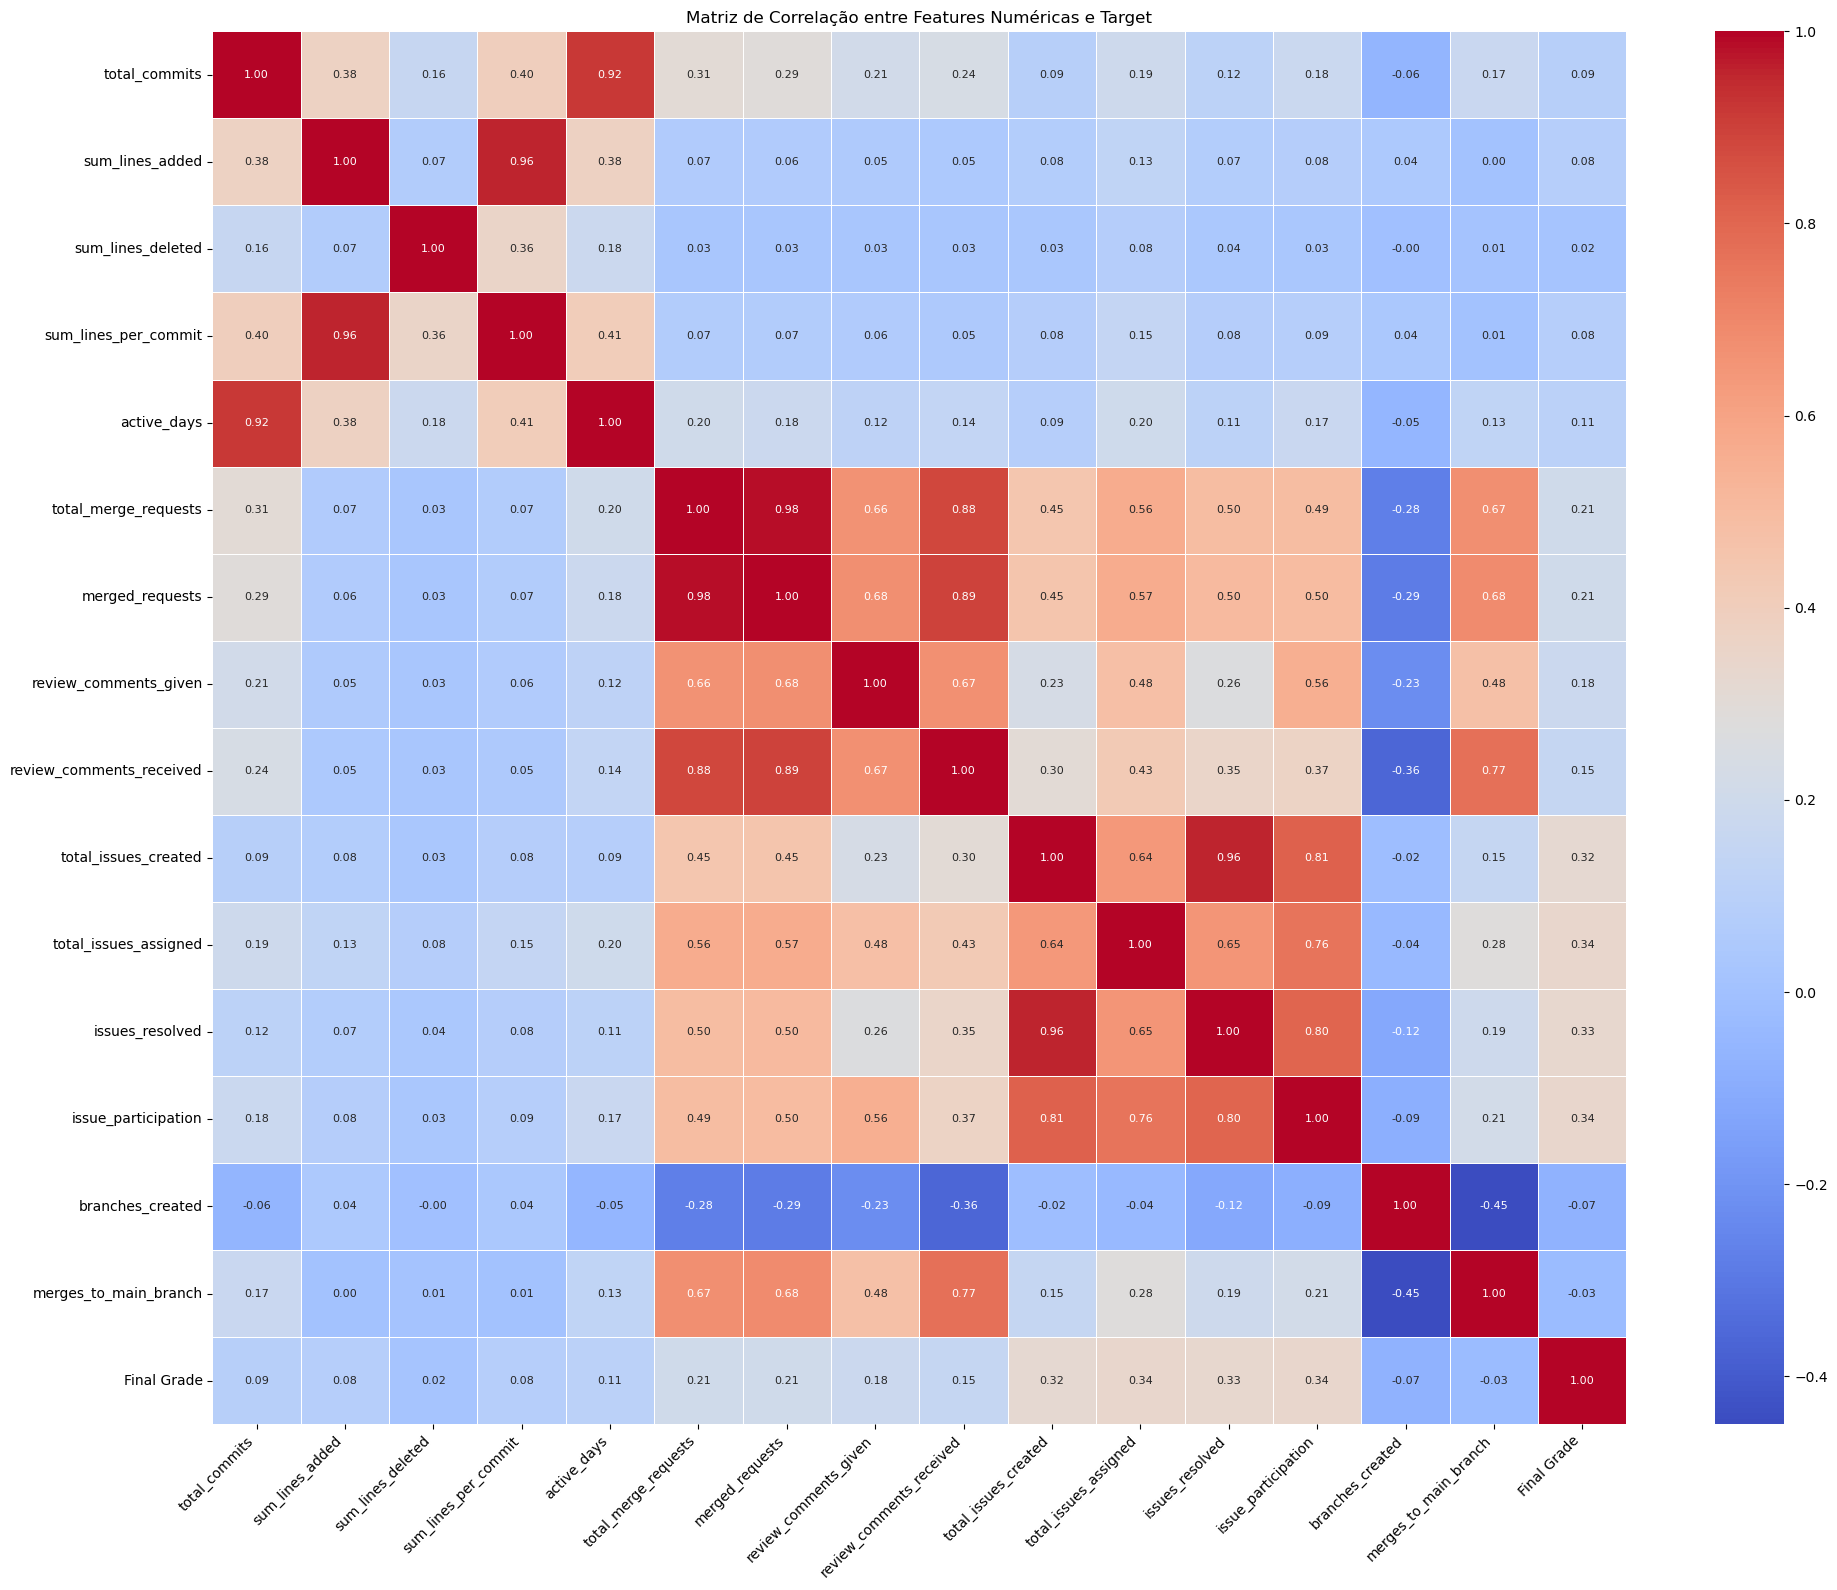


Correlações com a Variável Alvo (ordenadas):
Final Grade                 1.000000
issue_participation         0.340007
total_issues_assigned       0.339348
issues_resolved             0.334547
total_issues_created        0.322112
total_merge_requests        0.207245
merged_requests             0.207091
review_comments_given       0.183624
review_comments_received    0.153670
active_days                 0.107506
total_commits               0.090429
sum_lines_added             0.083835
sum_lines_per_commit        0.083616
sum_lines_deleted           0.017482
merges_to_main_branch      -0.025622
branches_created           -0.072790
Name: Final Grade, dtype: float64


In [219]:
# Incluir a variável alvo na matriz de correlação
cols_for_corr = numerical_features + [target]
correlation_matrix = df_all_clean[cols_for_corr].corr()

plt.figure(figsize=(20, 16)) # Ajustar tamanho para melhor visualização
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Matriz de Correlação entre Features Numéricas e Target')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nCorrelações com a Variável Alvo (ordenadas):")
target_correlations = correlation_matrix[target].sort_values(ascending=False)
print(target_correlations)

- branches_created, merges to main branch, sum lines delected, sum lined added e total_commits parecem ser aquelas com menos influencia no target (-10%)
- issue_particition e total issues assigned e issues resolved e total issues created oarece, por outro lado serem bastante pertinenentes
- total comits e active days estão mesmo muito correlacionadas entre si, vamos entao eliminar aquele que menos influencia o target, ou seja, total commits
- total merge requests e merged request estao tambem muito correlacionados entre si
- total issues e issues resolved tambem

In [220]:
# Transformação de Features: --> nas que tinham skewness alta
# e que não eram todas iguais a zero
features_to_log_transform = [
    'total_commits', 'sum_lines_added', 'sum_lines_deleted',
    'sum_lines_per_commit', 'active_days', 'total_merge_requests',
    'merged_requests', 'review_comments_given', 'review_comments_received',
    'total_issues_created', 'total_issues_assigned', 'issues_resolved',
    'issue_participation', 'merges_to_main_branch' # Adicionar ou remover conforme sua análise
]
for col in features_to_log_transform:
    df_all_clean[col + '_log'] = np.log1p(df_all_clean[col])

e portanto vamos refazer a matriz de correlação


Colunas após a transformação: ['interval', 'total_commits', 'sum_lines_added', 'sum_lines_deleted', 'sum_lines_per_commit', 'active_days', 'total_merge_requests', 'merged_requests', 'review_comments_given', 'review_comments_received', 'total_issues_created', 'total_issues_assigned', 'issues_resolved', 'issue_participation', 'branches_created', 'merges_to_main_branch', 'Final Grade', 'total_commits_log', 'sum_lines_added_log', 'sum_lines_deleted_log', 'sum_lines_per_commit_log', 'active_days_log', 'total_merge_requests_log', 'merged_requests_log', 'review_comments_given_log', 'review_comments_received_log', 'total_issues_created_log', 'total_issues_assigned_log', 'issues_resolved_log', 'issue_participation_log', 'merges_to_main_branch_log']

Colunas selecionadas para a nova matriz de correlação:
['active_days_log', 'branches_created', 'interval', 'issue_participation_log', 'issues_resolved_log', 'merged_requests_log', 'merges_to_main_branch_log', 'review_comments_given_log', 'review_co

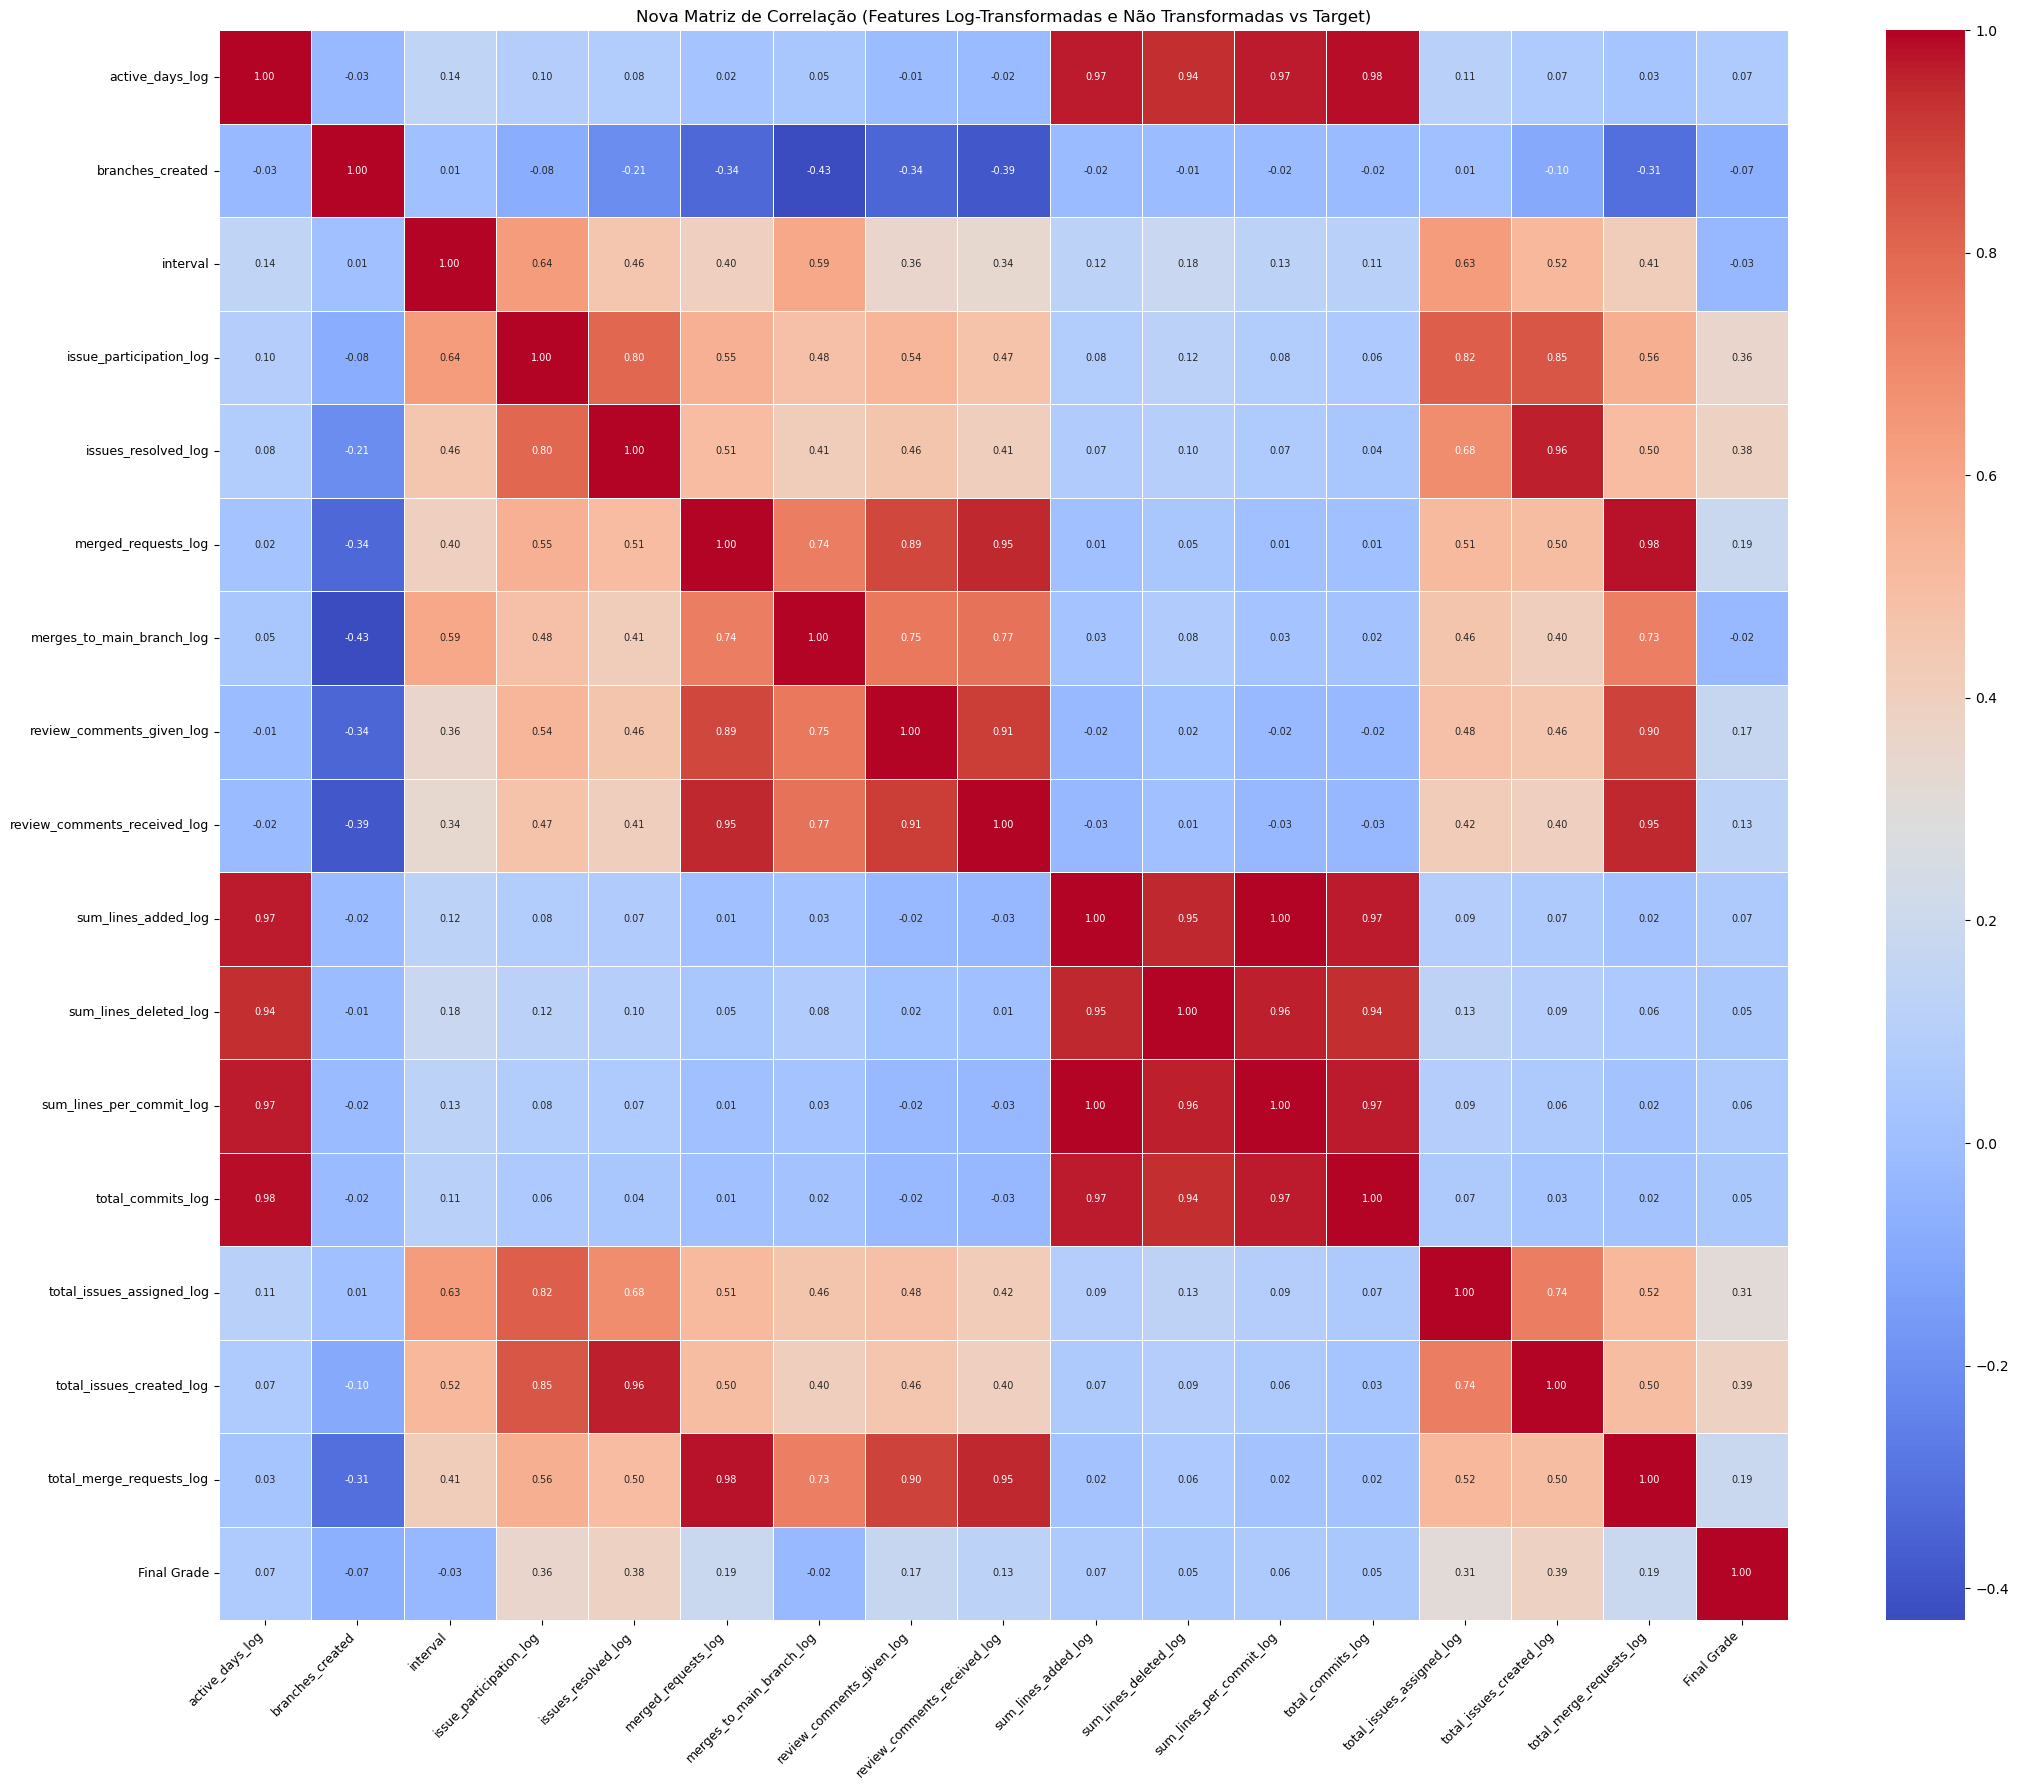


Novas Correlações com a Variável Alvo (ordenadas):
Final Grade                     1.000000
total_issues_created_log        0.390029
issues_resolved_log             0.381721
issue_participation_log         0.356270
total_issues_assigned_log       0.313117
total_merge_requests_log        0.189515
merged_requests_log             0.188504
review_comments_given_log       0.169903
review_comments_received_log    0.127052
active_days_log                 0.072125
sum_lines_added_log             0.067221
sum_lines_per_commit_log        0.064144
total_commits_log               0.054190
sum_lines_deleted_log           0.054170
merges_to_main_branch_log      -0.024919
interval                       -0.029047
branches_created               -0.072790
Name: Final Grade, dtype: float64


In [221]:
df_transformed = df_all_clean.copy() # Trabalhar em uma cópia

features_to_log_transform = [
    'total_commits', 'sum_lines_added', 'sum_lines_deleted',
    'sum_lines_per_commit', 'active_days', 'total_merge_requests',
    'merged_requests', 'review_comments_given', 'review_comments_received',
    'total_issues_created', 'total_issues_assigned', 'issues_resolved',
    'issue_participation', 'merges_to_main_branch'
    # 'last_minute_commits' não foi incluída aqui pois era 0 nos seus dados de exemplo.
    # Se tiver variância e for assimétrica, adicione-a.
]


for col in features_to_log_transform:
    df_transformed[col + '_log'] = np.log1p(df_transformed[col])

print("\nColunas após a transformação:", df_transformed.columns.tolist())


# --- Agora, vamos montar a lista de colunas para a nova matriz de correlação ---

target = 'Final Grade'
cols_for_new_corr = []

# Adicionar as versões logarítmicas das features transformadas
for original_col_name in features_to_log_transform:
    log_col_name = original_col_name + '_log'
    if log_col_name in df_transformed.columns: # Verifica se a coluna _log foi realmente criada
        cols_for_new_corr.append(log_col_name)


# Adicionar features originais que NÃO foram transformadas
# (exclua a variável alvo e as que já tiveram sua versão _log adicionada)
all_original_features = [col for col in df_all_clean.columns if col != target and col not in features_to_log_transform]

for col in all_original_features:
    if col in df_transformed.columns: # Verifica se a coluna original ainda está lá (deveria estar)
        cols_for_new_corr.append(col)

# Adicionar a variável alvo
if target in df_transformed.columns:
    cols_for_new_corr.append(target)
else:
    print(f"Aviso: Variável alvo '{target}' não encontrada no DataFrame.")


# Remover duplicatas caso alguma coluna tenha sido adicionada duas vezes (improvável com esta lógica)
cols_for_new_corr = sorted(list(set(cols_for_new_corr))) # Ordenar para consistência
# Re-garantir que o target está no final, se existir
if target in cols_for_new_corr:
    cols_for_new_corr.remove(target)
    cols_for_new_corr.append(target)

print("\nColunas selecionadas para a nova matriz de correlação:")
print(cols_for_new_corr)

# Verificar se há colunas suficientes para calcular a correlação
if len(cols_for_new_corr) < 2:
    print("Não há colunas suficientes para calcular a matriz de correlação.")
else:
    # Calcular a nova matriz de correlação
    new_correlation_matrix = df_transformed[cols_for_new_corr].corr()

    # Plotar a nova matriz de correlação
    plt.figure(figsize=(22, 18)) # Ajuste o tamanho conforme necessário
    sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 7}) # Ajustar tamanho da anotação
    plt.title('Nova Matriz de Correlação (Features Log-Transformadas e Não Transformadas vs Target)')
    plt.xticks(rotation=45, ha='right', fontsize=9) # Ajustar tamanho da fonte dos ticks
    plt.yticks(rotation=0, fontsize=9) # Ajustar tamanho da fonte dos ticks
    plt.tight_layout()
    plt.show()

    # Mostrar as correlações com a variável alvo
    if target in new_correlation_matrix.columns:
        print("\nNovas Correlações com a Variável Alvo (ordenadas):")
        print(new_correlation_matrix[target].sort_values(ascending=False))
    else:
        print(f"Variável alvo '{target}' não encontrada na matriz de correlação calculada.")

análise:
- Melhora nas Correlações com Final Grade para Métricas de Volume:
    - sum_lines_added_log vs Final Grade: 0.07 (antes era 0.02)
    - sum_lines_deleted_log vs Final Grade: 0.05 (antes era 0.01)
    - total_commits_log vs Final Grade: 0.05 (antes era 0.08, aqui houve uma pequena redução, mas ainda fraca)
    - sum_lines_per_commit_log vs Final Grade: 0.06 (antes era 0.08)

ao reduzir o impacto dos outliers e a assimetria, uma relação (ainda que fraca) com a nota final começou a aparecer para algumas dessas métricas de volume que antes estavam quase em zero.

- Features de "Issue" Continuam Fortes (e algumas melhoraram):
    - total_issues_created_log vs Final Grade: 0.39 (era 0.32) - Agora é a mais forte!
    - issues_resolved_log vs Final Grade: 0.38 (era 0.33)
    - issue_participation_log vs Final Grade: 0.36 (era 0.34)
    - total_issues_assigned_log vs Final Grade: 0.31 (era 0.34, pequena redução)

- merged_requests_log vs Final Grade: 0.19 (era 0.16)
- review_comments_given_log vs Final Grade: 0.17 (era 0.18)


In [222]:
numerical_features

['total_commits',
 'sum_lines_added',
 'sum_lines_deleted',
 'sum_lines_per_commit',
 'active_days',
 'total_merge_requests',
 'merged_requests',
 'review_comments_given',
 'review_comments_received',
 'total_issues_created',
 'total_issues_assigned',
 'issues_resolved',
 'issue_participation',
 'branches_created',
 'merges_to_main_branch']

In [223]:
# vamos remover sum_lines_per_commit_log
df_all_clean = df_all_clean.drop(columns=["sum_lines_per_commit_log"])
df_transformed = df_transformed.drop(columns=["sum_lines_per_commit_log"])
df_all_clean = df_all_clean.drop(columns=["sum_lines_per_commit"])
df_transformed = df_transformed.drop(columns=["sum_lines_per_commit"])
numerical_features.remove("sum_lines_per_commit")

Ratios Chave (usando as features originais e depois aplicando log, ou usando as features log já calculadas se a matemática permitir e fizer sentido):

In [224]:
# DataFrame a ser usado (garanta que é o que tem as colunas _log)
df_engineered = df_transformed.copy()
epsilon = 1e-6 # Caso não tenha sido definido antes

# --- 1. REMOVER REDUNDÂNCIA PERFEITA ---
# sum_lines_per_commit_log é perfeitamente correlacionado com sum_lines_added_log
feature_to_remove_perfect_corr = 'sum_lines_per_commit_log'
if feature_to_remove_perfect_corr in df_engineered.columns:
    df_engineered.drop(columns=[feature_to_remove_perfect_corr], inplace=True)
    print(f"Coluna removida devido à correlação perfeita: {feature_to_remove_perfect_corr}")
else:
    print(f"Aviso: Coluna {feature_to_remove_perfect_corr} não encontrada para remoção.")

# --- 2. LISTA INICIAL DE FEATURES A MANTER/CRIAR ---
# Começamos com as que não foram transformadas ou as transformadas que não são parte de ratios óbvios ainda.

# Features originais não transformadas (ou com baixa skewness)
initial_selected_features = ['interval', 'branches_created']

# Features logarítmicas que manteremos (seleção baseada na análise da matriz de correlação)
# Bloco Commits/Linhas (excluindo sum_lines_per_commit_log e active_days_log devido à alta corr com total_commits_log)
log_features_commits_lines = [
    'total_commits_log',       # Mantendo este como representante de 'active_days_log'
    'sum_lines_added_log',
    'sum_lines_deleted_log'
]

# Bloco Issues (total_issues_assigned_log e issues_resolved_log são muito altos com total_issues_created_log)
# Vamos focar em criar um ratio de resolução e manter 'total_issues_created_log' e 'issue_participation_log'
log_features_issues = [
    'total_issues_created_log',
    'issue_participation_log'
    # 'issues_resolved_log' e 'total_issues_assigned_log' serão usados para criar um ratio
]

# Bloco Merge Requests (total_merge_requests_log e merged_requests_log são muito altos)
# Vamos criar um ratio de merge
# Se for manter uma, 'total_merge_requests_log' ou 'merged_requests_log' (a segunda tem corr ligeiramente maior com target)

# Bloco Review Comments (review_comments_given_log e review_comments_received_log são muito altos)
# Vamos criar uma feature de atividade total de review ou escolher uma.
# Por agora, podemos manter 'review_comments_given_log' (ligeiramente maior corr com target do que a received)
log_features_reviews = ['review_comments_given_log'] # ou 'review_comments_received_log' ou uma combinada

# Outras features log
log_features_other = ['merges_to_main_branch_log']


# Combinar as listas de features log
selected_log_features = log_features_commits_lines + log_features_issues + log_features_reviews + log_features_other

# Verificar se todas as features selecionadas existem no df_engineered
final_selection_base = []
for col in initial_selected_features + selected_log_features:
    if col in df_engineered.columns:
        final_selection_base.append(col)
    else:
        print(f"Aviso: Coluna selecionada '{col}' não encontrada em df_engineered.")

print("\nFeatures base selecionadas antes da engenharia de ratios:")
print(final_selection_base)

# Adicionar o target para análises futuras, mas não para a modelagem direta como feature
if target not in final_selection_base and target in df_engineered.columns:
    print(f"(Variável alvo '{target}' será mantida separadamente)")

# Criar um DataFrame apenas com estas features base + target para facilitar
# df_base_for_ratios = df_engineered[final_selection_base + [target]].copy()
# No entanto, para criar ratios, precisamos das colunas ORIGINAIS (não log)
# Então vamos trabalhar com df_engineered, que tem tudo.

Aviso: Coluna sum_lines_per_commit_log não encontrada para remoção.

Features base selecionadas antes da engenharia de ratios:
['interval', 'branches_created', 'total_commits_log', 'sum_lines_added_log', 'sum_lines_deleted_log', 'total_issues_created_log', 'issue_participation_log', 'review_comments_given_log', 'merges_to_main_branch_log']
(Variável alvo 'Final Grade' será mantida separadamente)


In [225]:
print("\n--- Iniciando Engenharia de Features (Ratios e Combinadas) ---")

# --- Ratios ---
# Usar as colunas ORIGINAIS para calcular ratios, depois aplicar log1p se necessário

# 1. Ratio de Merge Requests
# Precisamos das colunas originais: 'merged_requests' e 'total_merge_requests'
if 'merged_requests' in df_engineered.columns and 'total_merge_requests' in df_engineered.columns:
    df_engineered['merged_ratio'] = df_engineered['merged_requests'] / (df_engineered['total_merge_requests'] + epsilon)
    df_engineered['merged_ratio_log'] = np.log1p(df_engineered['merged_ratio'])
    final_selection_base.append('merged_ratio_log') # Adicionar à nossa lista de features finais
    print("Feature 'merged_ratio_log' criada.")
else:
    print("Aviso: Colunas para 'merged_ratio' não encontradas.")

# 2. Ratio de Resolução de Issues
# Precisamos de 'issues_resolved' e 'total_issues_assigned' (ou 'total_issues_created')
if 'issues_resolved' in df_engineered.columns and 'total_issues_assigned' in df_engineered.columns:
    df_engineered['issue_resolution_rate_assigned'] = df_engineered['issues_resolved'] / (df_engineered['total_issues_assigned'] + epsilon)
    df_engineered['issue_resolution_rate_assigned_log'] = np.log1p(df_engineered['issue_resolution_rate_assigned'])
    final_selection_base.append('issue_resolution_rate_assigned_log')
    print("Feature 'issue_resolution_rate_assigned_log' criada.")
else:
    print("Aviso: Colunas para 'issue_resolution_rate_assigned' não encontradas.")

if 'issues_resolved' in df_engineered.columns and 'total_issues_created' in df_engineered.columns:
    df_engineered['issue_resolution_rate_created'] = df_engineered['issues_resolved'] / (df_engineered['total_issues_created'] + epsilon)
    df_engineered['issue_resolution_rate_created_log'] = np.log1p(df_engineered['issue_resolution_rate_created'])
    # Poderíamos adicionar esta também, ou escolher uma. Por agora, vamos adicionar para análise.
    final_selection_base.append('issue_resolution_rate_created_log')
    print("Feature 'issue_resolution_rate_created_log' criada.")
else:
    print("Aviso: Colunas para 'issue_resolution_rate_created' não encontradas.")


# 3. Commits por Dia Ativo
if 'total_commits' in df_engineered.columns and 'active_days' in df_engineered.columns:
    df_engineered['commits_per_active_day'] = df_engineered['total_commits'] / (df_engineered['active_days'] + epsilon)
    df_engineered['commits_per_active_day_log'] = np.log1p(df_engineered['commits_per_active_day'])
    final_selection_base.append('commits_per_active_day_log')
    print("Feature 'commits_per_active_day_log' criada.")
else:
    print("Aviso: Colunas para 'commits_per_active_day' não encontradas.")


# --- Features Combinadas ---
# 1. Atividade Total de Review (soma dos dados originais, depois log)
if 'review_comments_given' in df_engineered.columns and 'review_comments_received' in df_engineered.columns:
    df_engineered['total_review_activity'] = df_engineered['review_comments_given'] + df_engineered['review_comments_received']
    df_engineered['total_review_activity_log'] = np.log1p(df_engineered['total_review_activity'])
    final_selection_base.append('total_review_activity_log')
    # Como criamos esta, podemos remover 'review_comments_given_log' da seleção base se ela estiver lá
    if 'review_comments_given_log' in final_selection_base:
        final_selection_base.remove('review_comments_given_log')
        print("Substituindo 'review_comments_given_log' por 'total_review_activity_log'.")
    print("Feature 'total_review_activity_log' criada.")
else:
    print("Aviso: Colunas para 'total_review_activity' não encontradas.")


# Limpar a lista final_selection_base de possíveis duplicatas e garantir que são colunas existentes
final_engineered_features = []
for col in sorted(list(set(final_selection_base))): # Ordenar para consistência
    if col in df_engineered.columns:
        final_engineered_features.append(col)
    else:
        print(f"Aviso pós-engenharia: Coluna '{col}' não encontrada em df_engineered.")

print("\nFeatures finais selecionadas após engenharia:")
print(final_engineered_features)

# Criar o DataFrame final para modelagem (apenas features selecionadas)
X_final = df_engineered[final_engineered_features].copy()
y_final = df_engineered[target].copy()

print("\nDimensões de X_final:", X_final.shape)
print("Primeiras linhas de X_final:")
print(X_final.head())


--- Iniciando Engenharia de Features (Ratios e Combinadas) ---
Feature 'merged_ratio_log' criada.
Feature 'issue_resolution_rate_assigned_log' criada.
Feature 'issue_resolution_rate_created_log' criada.
Feature 'commits_per_active_day_log' criada.
Substituindo 'review_comments_given_log' por 'total_review_activity_log'.
Feature 'total_review_activity_log' criada.

Features finais selecionadas após engenharia:
['branches_created', 'commits_per_active_day_log', 'interval', 'issue_participation_log', 'issue_resolution_rate_assigned_log', 'issue_resolution_rate_created_log', 'merged_ratio_log', 'merges_to_main_branch_log', 'sum_lines_added_log', 'sum_lines_deleted_log', 'total_commits_log', 'total_issues_created_log', 'total_review_activity_log']

Dimensões de X_final: (1077, 13)
Primeiras linhas de X_final:
   branches_created  commits_per_active_day_log  interval  \
0                53                    0.693147         1   
1                53                    1.504077         1   


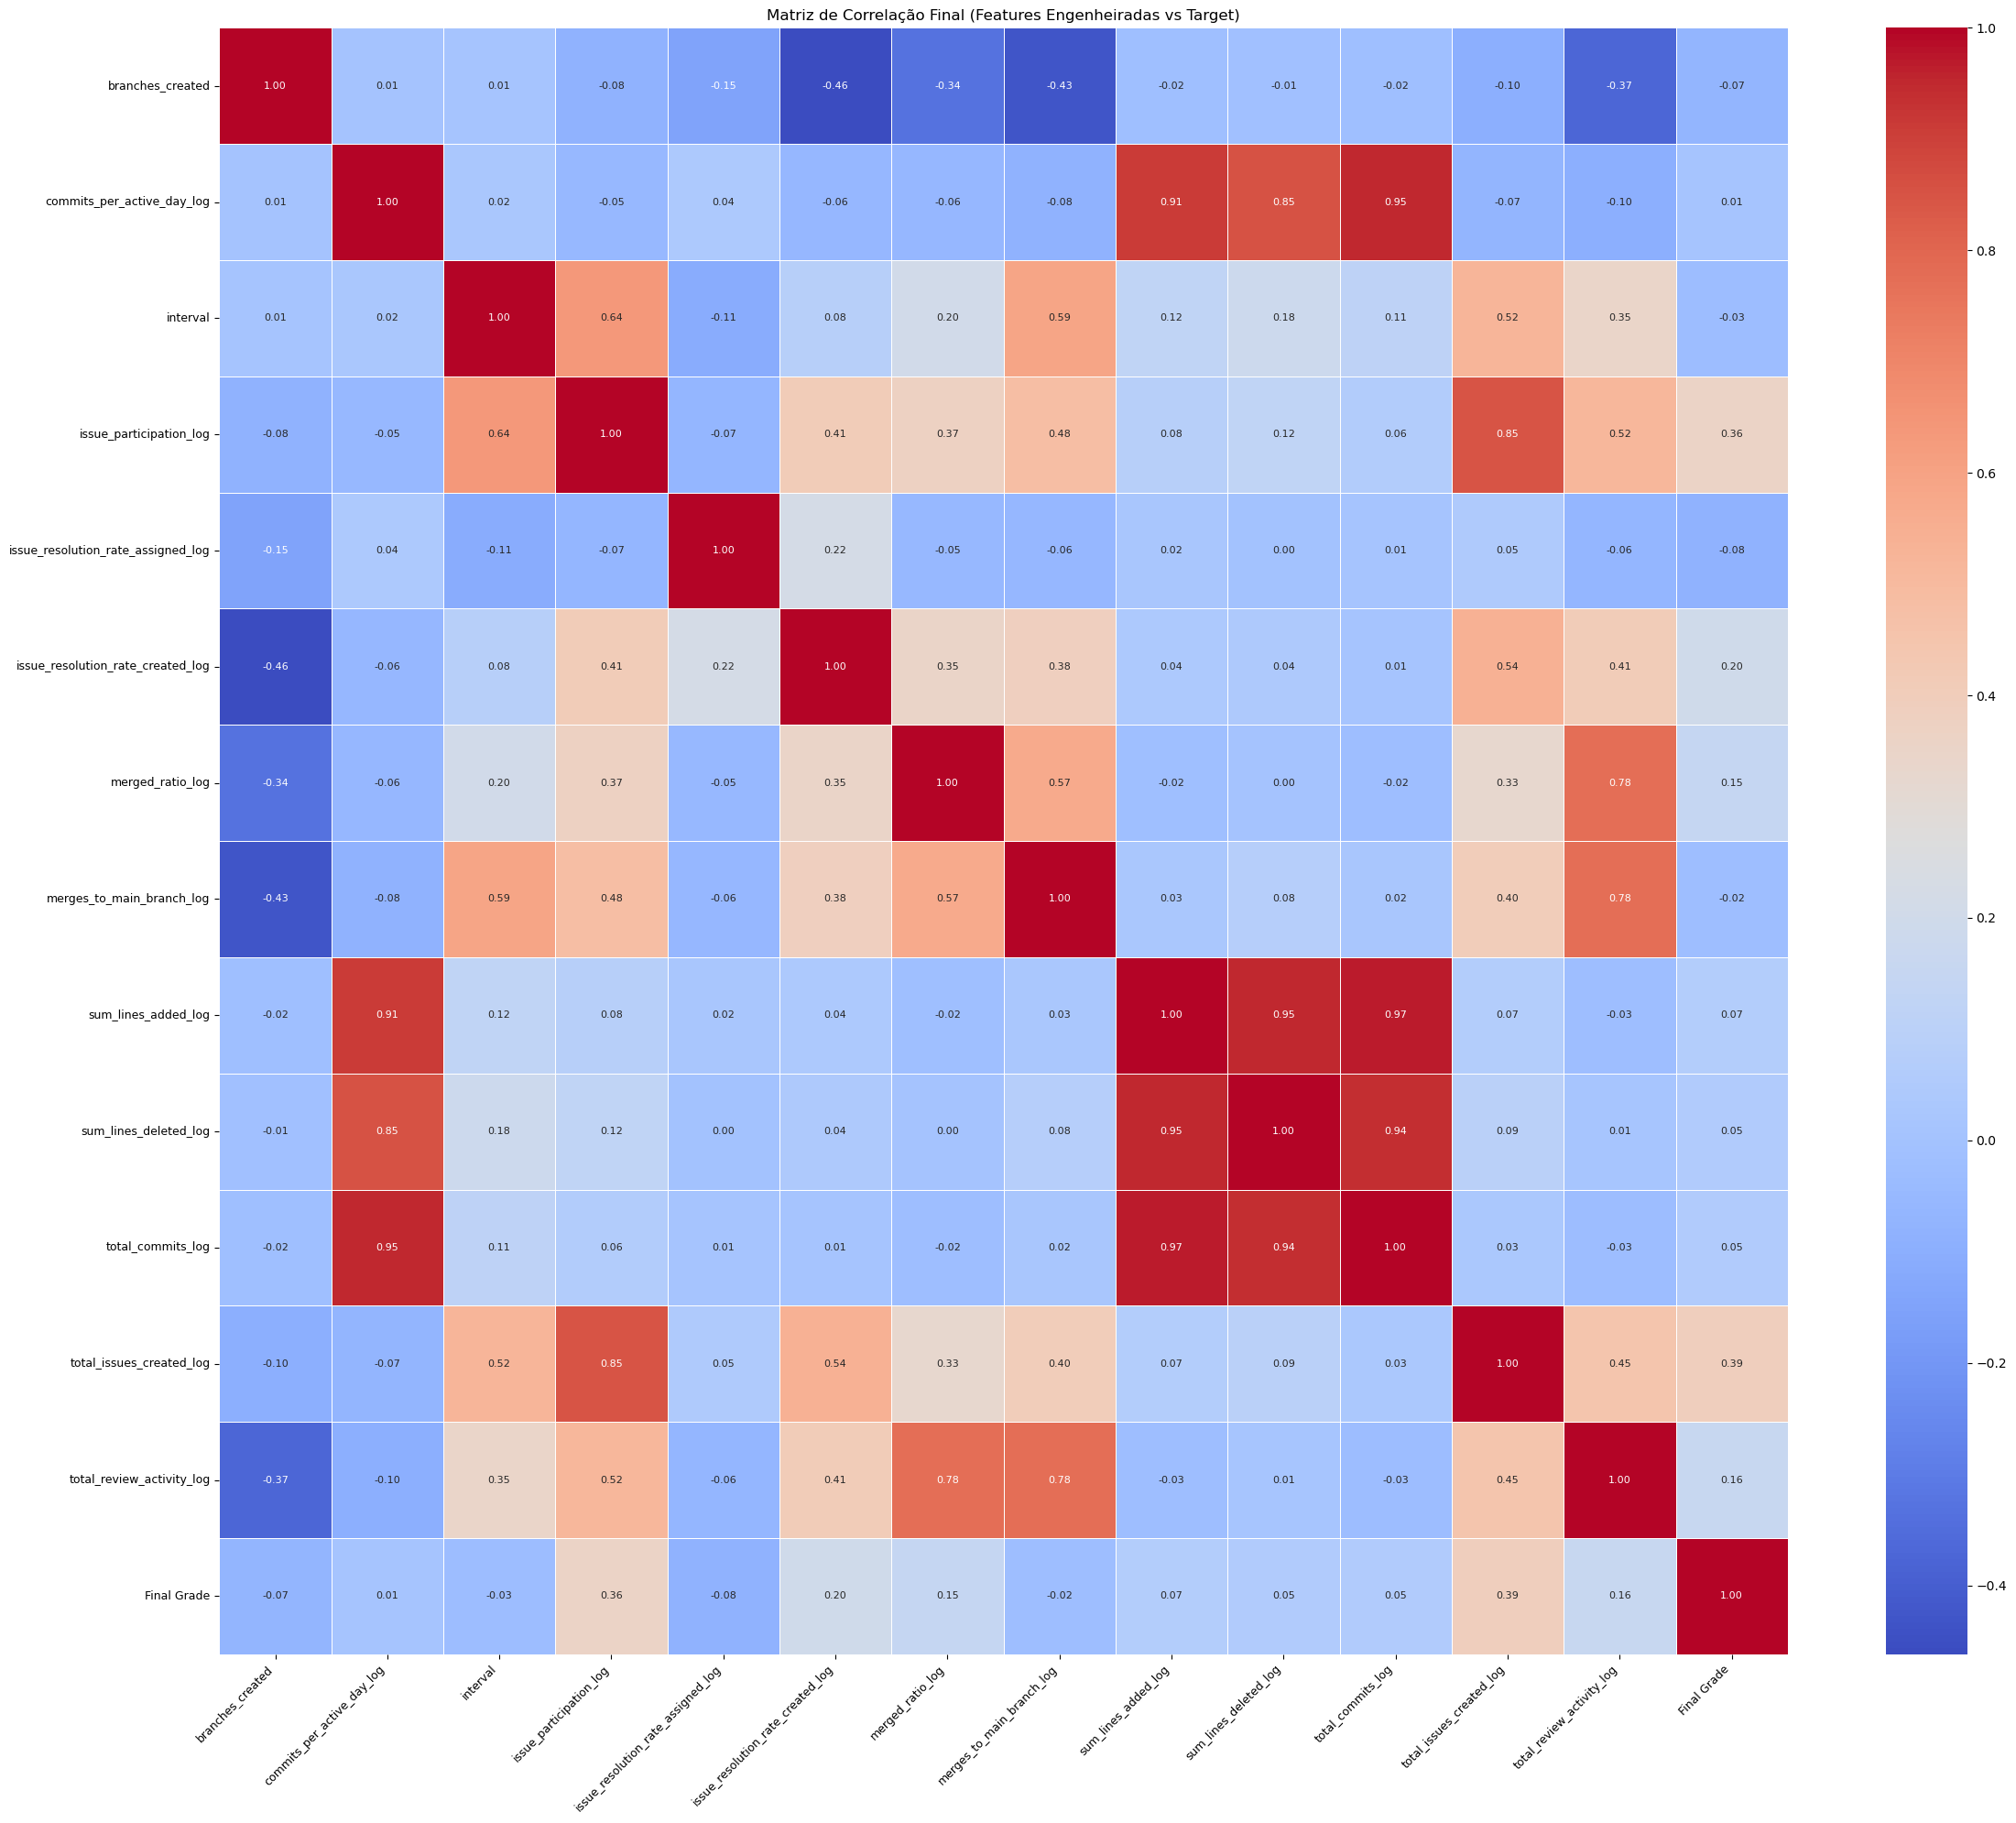


Correlações Finais com a Variável Alvo (ordenadas):
Final Grade                           1.000000
total_issues_created_log              0.390029
issue_participation_log               0.356270
issue_resolution_rate_created_log     0.199379
total_review_activity_log             0.159868
merged_ratio_log                      0.147388
sum_lines_added_log                   0.067221
total_commits_log                     0.054190
sum_lines_deleted_log                 0.054170
commits_per_active_day_log            0.009986
merges_to_main_branch_log            -0.024919
interval                             -0.029047
branches_created                     -0.072790
issue_resolution_rate_assigned_log   -0.079814
Name: Final Grade, dtype: float64


In [226]:
# Calcular a nova matriz de correlação com as features engenheiradas
# Adicionar o target temporariamente para a matriz de correlação
df_for_corr_plot = X_final.copy()
df_for_corr_plot[target] = y_final

correlation_matrix_engineered = df_for_corr_plot.corr()

plt.figure(figsize=(24, 20)) # Ajuste o tamanho conforme necessário
sns.heatmap(correlation_matrix_engineered, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.title('Matriz de Correlação Final (Features Engenheiradas vs Target)')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

print("\nCorrelações Finais com a Variável Alvo (ordenadas):")
print(correlation_matrix_engineered[target].sort_values(ascending=False))

# Remover a coluna target de df_for_corr_plot se você for usar X_final depois sem ela
# X_final já está correto (sem target)

In [227]:
# total_commits_log, sum_lines_added_log, sum_lines_deleted_log, e commits_per_active_day_log. 
# Todos altamente correlacionados entre si e com correlações muito baixas com Final Grade.
#  e removeria as outras três deste bloco (total_commits_log, sum_lines_deleted_log, commits_per_active_day_log).
df_engineered = df_engineered.drop(columns=["total_commits_log", "sum_lines_deleted_log", "commits_per_active_day_log"])

In [228]:
df_engineered

,interval,total_commits,sum_lines_added,sum_lines_deleted,active_days,total_merge_requests,merged_requests,review_comments_given,review_comments_received,total_issues_created,...,merges_to_main_branch_log,merged_ratio,merged_ratio_log,issue_resolution_rate_assigned,issue_resolution_rate_assigned_log,issue_resolution_rate_created,issue_resolution_rate_created_log,commits_per_active_day,total_review_activity,total_review_activity_log
0,1,5,89,6,5,0,0,0,0,1,...,2.564949,0.000000,0.000000,0.999999,0.693147,0.999999,0.693147,1.000000,0,0.000000
1,1,7,19,3,2,0,0,0,0,3,...,2.564949,0.000000,0.000000,1.499999,0.916290,1.000000,0.693147,3.499998,0,0.000000
2,1,11,686,3,4,1,1,1,7,2,...,2.564949,0.999999,0.693147,0.666666,0.510825,1.000000,0.693147,2.749999,8,2.197225
3,1,4,28,11,2,0,0,0,0,2,...,2.564949,0.000000,0.000000,1.000000,0.693147,1.000000,0.693147,1.999999,0,0.000000
4,1,3,19,1,2,0,0,3,0,1,...,2.564949,0.000000,0.000000,0.999999,0.693147,0.999999,0.693147,1.499999,3,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,5,0,0,0,0,0,0,0,0,34,...,2.833213,0.000000,0.000000,0.130435,0.122602,0.088235,0.084557,0.000000,0,0.000000
1073,5,0,0,0,0,0,0,0,0,13,...,2.833213,0.000000,0.000000,0.222222,0.200671,0.153846,0.143101,0.000000,0,0.000000
1074,5,0,0,0,0,0,0,0,0,6,...,2.833213,0.000000,0.000000,1.000000,0.693147,0.500000,0.405465,0.000000,0,0.000000
1075,5,0,0,0,0,0,0,0,0,0,...,2.833213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000


In [229]:
df_engineered.columns
# output: Index(['interval', 'total_commits', 'sum_lines_added', 'sum_lines_deleted',
#       'active_days', 'total_merge_requests', 'merged_requests',
#       'review_comments_given', 'review_comments_received',
#       'total_issues_created', 'total_issues_assigned', 'issues_resolved',
#       'issue_participation', 'branches_created', 'merges_to_main_branch',
#       'Final Grade', 'active_days_log', 'total_merge_requests_log',
#       'merged_requests_log', 'review_comments_given_log',
#       'review_comments_received_log', 'total_issues_created_log',
#       'total_issues_assigned_log', 'issues_resolved_log',
#       'issue_participation_log', 'merges_to_main_branch_log', 'merged_ratio',
#       'merged_ratio_log', 'issue_resolution_rate_assigned',
#       'issue_resolution_rate_assigned_log', 'issue_resolution_rate_created',
#       'issue_resolution_rate_created_log', 'commits_per_active_day',
#       'total_review_activity', 'total_review_activity_log'],
#      dtype='object')

Index(['interval', 'total_commits', 'sum_lines_added', 'sum_lines_deleted',
       'active_days', 'total_merge_requests', 'merged_requests',
       'review_comments_given', 'review_comments_received',
       'total_issues_created', 'total_issues_assigned', 'issues_resolved',
       'issue_participation', 'branches_created', 'merges_to_main_branch',
       'Final Grade', 'sum_lines_added_log', 'active_days_log',
       'total_merge_requests_log', 'merged_requests_log',
       'review_comments_given_log', 'review_comments_received_log',
       'total_issues_created_log', 'total_issues_assigned_log',
       'issues_resolved_log', 'issue_participation_log',
       'merges_to_main_branch_log', 'merged_ratio', 'merged_ratio_log',
       'issue_resolution_rate_assigned', 'issue_resolution_rate_assigned_log',
       'issue_resolution_rate_created', 'issue_resolution_rate_created_log',
       'commits_per_active_day', 'total_review_activity',
       'total_review_activity_log'],
      dtype='ob

In [230]:
# Features finais DESEJADAS para o modelo
# Esta lista é construída com base em:
# 1. Boa correlação com 'Final Grade'.
# 2. Representar um conceito único ou ser o melhor representante de um bloco de features.
# 3. Já estarem na escala logarítmica (se aplicável) ou serem features que não precisaram de log.

features_finais_para_X_modelo = [
    # Features de Issues (as mais fortes consistentemente)
    'total_issues_created_log',          # Corr ~0.39 com target
    'issue_participation_log',           # Corr ~0.36 com target
    'issue_resolution_rate_created_log', # Corr ~0.23 com target (melhor ratio de resolução)

    # Features de Review e Merge (moderadas)
    'total_review_activity_log',         # Corr ~0.16 com target (combinada)
    'merged_ratio_log',                  # Corr ~0.15 com target (ratio)

    # Representante do Bloco de Código/Commits (a melhorzinha das fracas, para não perder o sinal)
    'sum_lines_added_log',               # Corr ~0.07 com target

    # Features com baixa correlação mas que podem ser exploradas por modelos baseados em árvores
    'interval',                          # Original, sem log (se for tratada como categórica ordinal)
    'branches_created',                  # Original, sem log (baixa skewness)
]

print("Lista de features finais desejadas para X_modelo:")
print(features_finais_para_X_modelo)

Lista de features finais desejadas para X_modelo:
['total_issues_created_log', 'issue_participation_log', 'issue_resolution_rate_created_log', 'total_review_activity_log', 'merged_ratio_log', 'sum_lines_added_log', 'interval', 'branches_created']


In [231]:
len(features_finais_para_X_modelo)

8

In [232]:
# Verificar se todas as features desejadas estão presentes em df_engineered
todas_presentes = True
for feature_desejada in features_finais_para_X_modelo:
    if feature_desejada not in df_engineered.columns:
        print(f"ATENÇÃO: Feature desejada '{feature_desejada}' NÃO está em df_engineered.columns!")
        todas_presentes = False

if todas_presentes:
    print("\nTodas as features desejadas estão presentes em df_engineered.")
else:
    print("\nPROBLEMA: Nem todas as features desejadas estão em df_engineered. Verifique os passos anteriores.")
    print("Colunas atuais em df_engineered:", df_engineered.columns.tolist())


Todas as features desejadas estão presentes em df_engineered.
